In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.processing import *

## processing

#### Raw image

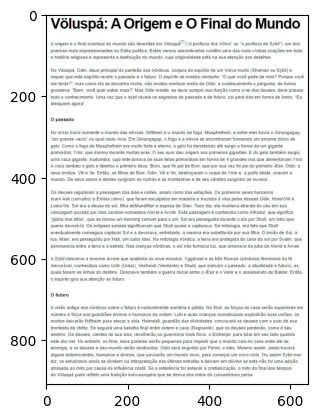

In [3]:
img = read_img()
show(img)

### Processing

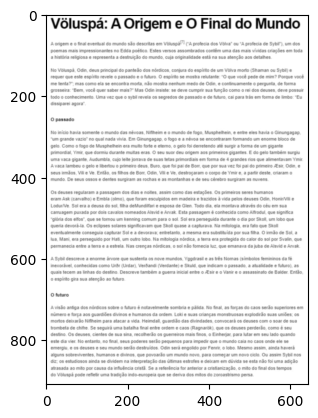

In [4]:
grey = greyscale(img)
gauss = gaussian(grey, 3, 3)

show(gauss)

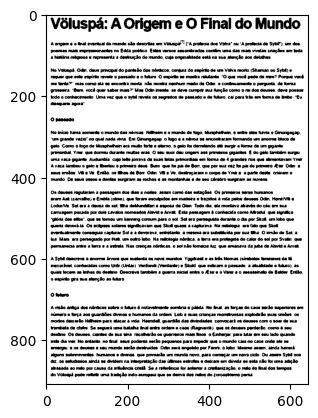

In [5]:
thres = thresholding(gauss)
#thres = gaussian_thresholding(grey)

show(thres)

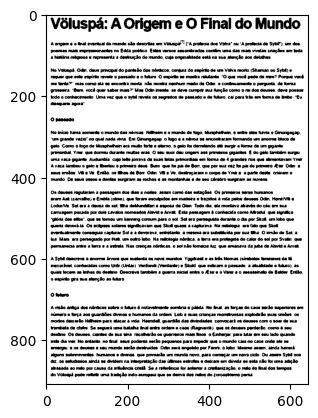

In [6]:
processed = thres
processed = erode(processed, iterations=1)

show(processed)

## Character Segmentation

In [7]:
(get_word_boxes(processed.copy(), (0, 255, 0), img=img.copy()))

array([[[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

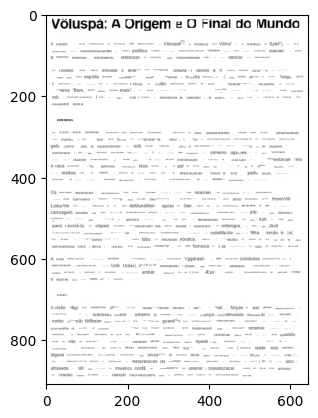

In [8]:
show(get_word_boxes(img.copy(), (255,255,255)))

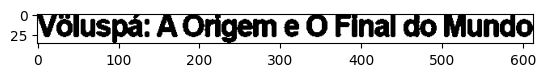

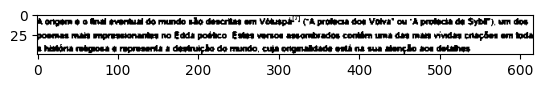

À origem é o fnal eventual do mundo são descritas em Vôtuspá”” : (7A profecia dos Volva" ou 'A profecia de SyBiP), um dos.
poemas matt mpreseionantes no Edda poútco. Éstes vertos assombrados contárm uma das maa vívas crações em toda
s história rebguoa.à 4 representa à destruição da mundo, cuja ongeralidade está ná sua alenção aoe detalhas.




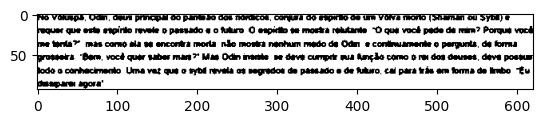

No VolapS, Odin. deue princiçal do pante'do dos nórdbços, confurá do eaprriia de um Volva morto (Sramán ou SY54) e
reques que exte mtpirdo reveie o pestado « o fuluro O esgírio te mortra rebutante “O que você pede da mim? Porque você
me fenta? man como ala su encontra moria não mostra nentum medo de Qdn « contnuamente o pergunt, de forrma
grasseira “Bern, você quer tabes mari?” Mas Odin inteie. ne úeve cumpri mu Aanção como 6 rer dos deuses, deve possus
toda o conhecimento Lma vaz que o +y64 revela o pegredos de passado e de fubiso, tal para irás em foma de lmbo “Eu
Oettgpárs agora



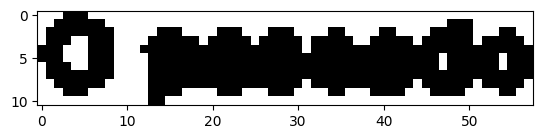

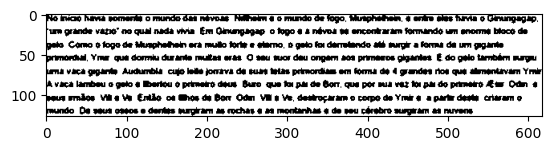

Na inscao ansa pomenta o mundo úss nóvoss Núlherm 4 c mundo de fogo. Muaphefhein, 4 entre sies funia o Ginungagão.
"um grande vano” no qual nada vivia. Ém Ginungagaç o fogo 4 & návos ee encontraram formando um snomma btoco de
geta Como 6 foga de Muspheihein era mudo forier « etemo, 6 gelo foi dermetendo aó eurgir a forma da um grante
primardhal, Yrae que dorma duránte muatas eras. Q Seu tuor deu ongem 204 preneeos gigantes. É do gelo também muuu
uma vaça gigante Audumôia cujo lete jomava de euat Mrtas primondiam em forma de d grandes rou que almentavam Ymir
A vaça lambeu o gelo 4 beriou G primeiro deus Buro que o pã de Gorr, qua por mu vaz for pa de prmeiro é Qdn «
emus mmãos V s V6 Então o Mhos de Bor Odm VE K Ve, dettroçaram o como de Yrá & a gadir deste eriasam o
mundo De seus ossos e dentes mungiram às cochas & a4 montanhas € de peu córebro surgeám a4 ruvens



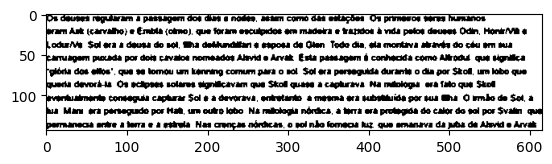

De deusrs Megularam à pastagem dot dias « nodes. sttam como das estações Ou prmesos venta humanos.
bram Ast (carvalho) « Embia (omo), que foram esculprios em madeira « tandios à vida peíos devess Odin, Honk N «
LodurVa Sol era 4 deusa do sei, Mha debiundifan « esposa de Glen. Toda dia, sia monteva através do céu em aus.
camaagem procada por dois cavatos nomeados Alvvid e Arvak: Ésta passagem é conhecida como ANrOGU que tigniiça.
(éria o aiios, que 96 lomou um Lennang comum para o sol Sol era perseguida duranis o dia por Skofl, um lobo que
queda devorá la O4 pcâpaes notares signiicavam que S&of quasa à cagêureva Ma mániogaa erá fato que Siof
tventusimento conteguia capárar Soi t à devorava. entretanto à mesma srá tubsmárica por tua uha O wmão de Sol a
hua Mans era penseguada por Hae, um eutro lebo. Na milciogia nóniica, à terra erá protegida d6 calor da $ol por Svalin. que
perrnanecia antre à terra e à etirula Nas crençãs nórticas, o poi nÃo fomeca hit que emantva da juba da Alevid e Ar

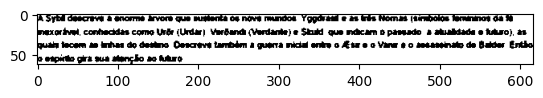

A YE deecrina à norme árvora que sustenta os nove mundos Yogórasd « às irês Nomas (tumboios Mementnos da 16
mexorável, contecidas coma Urêe (Lniar) Verdandi (Verdante) e Siuid que nácam 6 passado * atualdade e lubro). às
quais tecem s inhas do destno Gescrava também à querra micial entre o E4x e o Vana é o aesaseinato de Bsides Entio
a espirão gira sua atenção ac huturo:



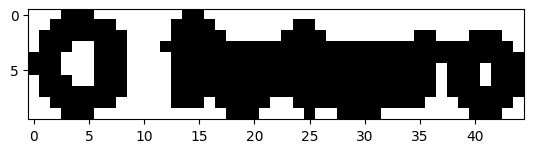

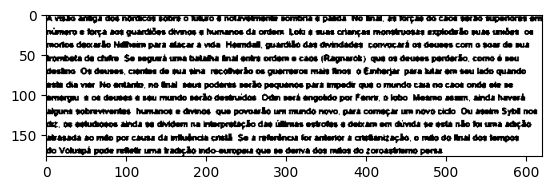

AÀ visão antga dos nordicis pobre o futyro é notevetmente sombrna « pabda to inal, ee forção do caoa serão supertanta em
número e força so4 quantiões divnnos « humanos dá ordem Lota 4 suas crianças monstnvosas axpiodeão muas umbes om
morios decarão Núlheim para aaças à wia Hemmósil guardião das dwvindades convocará o4 úeuees com o $02r de mus
Irombeta de chfre Se veguaá uma tutaiva ánal entra oniem e caos (Ragnarok) que o1 úeuses perterão, coma é seu
Gestno Os deuses, ciontes de ius siná recolherão os guemence mais finos o Emberjar para kutar em seu lado quando
esta dia vc No antanio, no fnal seus poderas serão pequenos para impedi que o munda taa no caos onda ele se
een 4 o4 deuees « neu mundo serão destruídos Odim será engobda por Fanrs, 1 lobo. Metrmo aemm, ainda harverd
alguns vobreviventas. bumanos e úrvnos que povoasão um mundo novo, pará começãr um núvo cido. Ou aseim Sybi noa.
&2. 06 eetudases anda su divídem na interpretação ds úllruas estrotes « deixam em divida e esta não lo

'AÀ visão antga dos nordicis pobre o futyro é notevetmente sombrna « pabda to inal, ee forção do caoa serão supertanta em\nnúmero e força so4 quantiões divnnos « humanos dá ordem Lota 4 suas crianças monstnvosas axpiodeão muas umbes om\nmorios decarão Núlheim para aaças à wia Hemmósil guardião das dwvindades convocará o4 úeuees com o $02r de mus\nIrombeta de chfre Se veguaá uma tutaiva ánal entra oniem e caos (Ragnarok) que o1 úeuses perterão, coma é seu\nGestno Os deuses, ciontes de ius siná recolherão os guemence mais finos o Emberjar para kutar em seu lado quando\nesta dia vc No antanio, no fnal seus poderas serão pequenos para impedi que o munda taa no caos onda ele se\neen 4 o4 deuees « neu mundo serão destruídos Odim será engobda por Fanrs, 1 lobo. Metrmo aemm, ainda harverd\nalguns vobreviventas. bumanos e úrvnos que povoasão um mundo novo, pará começãr um núvo cido. Ou aseim Sybi noa.\n&2. 06 eetudases anda su divídem na interpretação ds úllruas estrotes « deixam em divida e es

In [9]:
img_dict = get_data(processed)
segments = list()
segments_txt = list()

for i in range(len(img_dict['text'])):
    (x, y, w, h) = (img_dict['left'][i], img_dict['top'][i], img_dict['width'][i], img_dict['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if img_dict['level'][i] == 2:
        segments.append(crop_img)
        show(crop_img)
        #print(img_dict['text'][i])
        segment_txt = ocr(crop_img)
        segments_txt.append(segment_txt)
        print(segment_txt)
        
segments_txt.pop()

## OCRing

In [10]:
raw_text = ocr(img)
processed_text = ocr(processed)
segmented_text = ' '.join(segments_txt)

## Postprocessing

### Raw image text

In [11]:
raw_text_pp = remove_double_spaces(' '.join(remove_special(raw_text)))
raw_text_pp = remove_single_letters(raw_text_pp, keep_e=True, keep_a=True)
print(raw_text_pp)

Vôluspá A Origem e  Final do Mundo AA origem e  final eventual do mundo são descritas em Vôluspál A profecia dos Volva ou A profecia de Sybif um dos poemas mais impressionantes no Edda poético Estes versos assombrados contém uma das mais vívidas criações em toda a história religiosa e representa a destruição do mundo cuja originalidade está na sua atenção aos detalhes No Vôluspá Odin deus principal do panteão dos nórdicos conjura do espírito de um Vôlva morto Shaman ou Sybil e requer que este espínito revele  passado e  futuro  espírito se mostra relutante  que você pede de mim Porque você me tenta mas como ela se encontra morta não mostra nenhum medo de Odin e continuamente  pergunta de forma grosseira Bem você quer saber mais Mas Odin insiste se deve cumprir sua função como  rei dos deuses deve possuir todo  conhecimento Uma vez que  sybil revela os segredos de passado e de fuluro cai para trás em forma de limbo Eu dissiparei agora  passado No início havia somente  mundo das névoas N

### Processed image text

In [12]:
processed_text_pp = remove_double_spaces(' '.join(remove_special(processed_text, keep_dot_comma=True)))
processed_text_pp = remove_single_letters(processed_text_pp, keep_e=True, keep_a=True, keep_o=True)
print(processed_text_pp)

Vôluspá A Origem e O Final do Mundo A ongem é o fnal eventual do mundo são descrias em Vetuspál A profecia dou Votva ou À protecia de SyBIF. um dos. poemes maii mpreseionantes no Edda poútco. Estes vertos assombrados contárm uma das maa vívas crações em toda à stória retguona  represerta à devtnuição do mundo. cuia onganaditáda emtá  vua atenção sx detaies No Vokmpá, Odin, deus pricapal do panteão dos nóriiços, conkea do espiria de um Volva morto Shaman ou Sybl . requer que este ntpírio reveie  passado o fuluro O espídio se mostra rebutante O que você pede da mim Porque você me fenta mas como eia se encontra morta não mostra nentwum medo de Odm contnuamente o pergunta, de forma grosseira Bem, você quer tabes mari Mas Odin inaie. e óeve cumprir mua Aanção como  nei dos deuses, deva postum Toda o conhacimento Uma vaz que o ytl revela o4 pegredos de paseado e de fuluro, tal para trás am forma de lmbo Eu aan agora  pessedo No inícro Narva pomenta o munda das névoas Hifieim é o mundo óe fog

### Processed and Segmented image text

In [13]:
segmented_text = remove_breaks(segmented_text, add_space=True)
segmented_text = remove_double_spaces(segmented_text)
segmented_text = remove_single_letters(segmented_text)
print(segmented_text)

 origem fnal eventual do mundo são descritas em Vôtuspá”” : (7A profecia dos Volva" ou 'profecia de SyBiP), um dos. poemas matt mpreseionantes no Edda poútco. Éstes vertos assombrados contárm uma das maa vívas crações em toda história rebguoa.representa destruição da mundo, cuja ongeralidade está ná sua alenção aoe detalhas. No VolapS, Odin. deue princiçal do pante'do dos nórdbços, confurá do eaprriia de um Volva morto (Sramán ou SY54) reques que exte mtpirdo reveie pestado « fuluro esgírio te mortra rebutante “que você pede da mim? Porque você me fenta? man como ala su encontra moria não mostra nentum medo de Qdn « contnuamente pergunt, de forrma grasseira “Bern, você quer tabes mari?” Mas Odin inteie. ne úeve cumpri mu Aanção como rer dos deuses, deve possus toda conhecimento Lma vaz que +y64 revela pegredos de passado de fubiso, tal para irás em foma de lmbo “Eu Oettgpárs agora Na inscao ansa pomenta mundo úss nóvoss Núlherm mundo de fogo. Muaphefhein, entre sies funia Ginungagão. "